In [611]:
#pip install statsmodels==0.6.0

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import mapclassify as mcl
from matplotlib.colors import Normalize
import geopandas as gdp
from statsmodels.tsa.arima.model import ARIMA

#from statsmodels.tsa.arima_model import ARIMA
#statsmodels.tsa.arima.model.ARIMA
#from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [64]:
crimes_df = pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv",parse_dates=['YEAR'])

In [65]:
crimes_main_df = crimes_df.copy()

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

In [66]:
crimes_df["TOTAL_THEFT"] = crimes_df["THEFT"] + crimes_df["OTHER THEFT"] + crimes_df["AUTO THEFT"]

In [67]:
crimes_df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'TOTAL_THEFT'],
      dtype='object')

In [68]:
crimes_df.head(5)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL_THEFT
0,ANDHRA PRADESH,ADILABAD,2001-01-01,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,398
1,ANDHRA PRADESH,ANANTAPUR,2001-01-01,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,732
2,ANDHRA PRADESH,CHITTOOR,2001-01-01,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,1446
3,ANDHRA PRADESH,CUDDAPAH,2001-01-01,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,346
4,ANDHRA PRADESH,EAST GODAVARI,2001-01-01,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,2042


In [69]:
crimes_df = crimes_df.rename(columns={'STATE/UT': 'STATE'})

In [70]:
crimes_df = crimes_df.rename(columns={'TOTAL IPC CRIMES': 'TOTAL'})

In [71]:
crimes_df['STATE'] = crimes_df['STATE'].replace(['A&N Islands', "Andhra Pradesh", 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'D&N Haveli', 'Daman & Diu', 'Delhi UT', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], 
                                                ["A & N ISLANDS", "ANDHRA PRADESH", 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI', 'DAMAN & DIU', 'DELHI UT', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR',
       'MEGHALAYA', 'MIZORAM', 'NAGALAND','ODISHA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',  'WEST BENGAL'])
 

In [72]:
crimes_df['DISTRICT'] = crimes_df['DISTRICT'].replace(["ZZ TOTAL"], ["TOTAL"])

In [73]:
crimes_df['DISTRICT'] = crimes_df['DISTRICT'].replace(["SOUTH-EAST", "SOUTH-WEST", "NORTH-EAST", "NORTH-WEST",
                                                     "IGI AIRPORT", "GRP(RLY)", "STF", 'DELHI UT TOTAL'], ["SOUTH EAST", "SOUTH WEST", "NORTH EAST", "NORTH WEST",
                                                     "I.G.I. AIRPORT", "G.R.P.(RLY)", "S.T.F.", 'TOTAL'])

In [74]:
crimes_df['DISTRICT'] = crimes_df['DISTRICT'].replace(["HOWRAH CITY"], ["HOWRAH"])

In [75]:
crimes_df['DISTRICT'] = crimes_df['DISTRICT'].replace(["HOWRAH G.R.P."], ["HOWRAH"])

In [76]:
crimes_df['DISTRICT'] = crimes_df['DISTRICT'].replace(['G.R.P. AJMER', 'G.R.P. JODHPUR'],['G.R.P.AJMER', 'G.R.P.JODHPUR'])

In [77]:
crimes_df.rename(columns={'HURT/GREVIOUS HURT': 'HURT', 'KIDNAPPING & ABDUCTION': 'KIDNAPPING', 'CAUSING DEATH BY NEGLIGENCE':'DEATH_BY_NEGLIGENCE', 
                          'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY':'ASSAULT_WOMEN_MODESTY','CRUELTY BY HUSBAND OR HIS RELATIVES': 'CRUELTY_BY_HUSBAND', 
                         'CRIMINAL BREACH OF TRUST':'CRIMINAL_BREACH_OF_TRUST'}, inplace=True)

In [95]:
crimes_df['STATE'].unique()

AttributeError: 'Series' object has no attribute 'DELHI'

In [45]:
crimes_df.shape

(9017, 34)

In [46]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   STATE                                        9017 non-null   object        
 1   DISTRICT                                     9017 non-null   object        
 2   YEAR                                         9017 non-null   datetime64[ns]
 3   MURDER                                       9017 non-null   int64         
 4   ATTEMPT TO MURDER                            9017 non-null   int64         
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER    9017 non-null   int64         
 6   RAPE                                         9017 non-null   int64         
 7   CUSTODIAL RAPE                               9017 non-null   int64         
 8   OTHER RAPE                                   9017 non-null   int64         
 9

In [47]:
crimes_state = crimes_df.groupby("STATE").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum ,'OTHER IPC CRIMES':sum, 'TOTAL':sum}).reset_index()
       

In [48]:
crimes_distribution = crimes_df[crimes_df.DISTRICT=='TOTAL']


In [49]:
crimes_distribution = crimes_distribution.groupby(["YEAR"]).agg({'MURDER':sum, 'ATTEMPT TO MURDER':sum,
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER':sum, 'RAPE':sum, 'CUSTODIAL RAPE':sum,
       'OTHER RAPE':sum, 'KIDNAPPING':sum,
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS':sum,
       'KIDNAPPING AND ABDUCTION OF OTHERS':sum, 'DACOITY':sum,
       'PREPARATION AND ASSEMBLY FOR DACOITY':sum, 'ROBBERY':sum, 'BURGLARY':sum,
        'RIOTS':sum, 'CRIMINAL_BREACH_OF_TRUST':sum,
       'CHEATING':sum, 'COUNTERFIETING':sum, 'ARSON':sum, 'HURT':sum,
       'DOWRY DEATHS':sum, 'ASSAULT_WOMEN_MODESTY':sum,
       'INSULT TO MODESTY OF WOMEN':sum, 'CRUELTY_BY_HUSBAND':sum,
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES':sum,
       'DEATH_BY_NEGLIGENCE':sum, 'OTHER IPC CRIMES':sum, "TOTAL_THEFT":sum}).reset_index()
       

In [56]:
crimes_distribution = crimes_distribution.append(crimes_distribution.sum().rename('total'))
crimes_distribution['YEAR'].replace(26091, 'Total', inplace=True)
crimes_distribution = crimes_distribution[crimes_distribution['YEAR'] == 'Total']
crimes_distribution

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT,DOWRY DEATHS,ASSAULT_WOMEN_MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY_BY_HUSBAND,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,DEATH_BY_NEGLIGENCE,OTHER IPC CRIMES,TOTAL_THEFT


In [ ]:

crimes_sum = crimes_distribution.T.reset_index()

In [51]:

labels = ['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'KIDNAPPING & ABDUCTION', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY',
       'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', "THEFTTOTAL"]

values = [435744, 387394, 47994, 272844, 422318, 63948, 35100, 280194, 1221740,847053,
         203648, 874927, 29067, 123061, 3706545, 99285, 523894, 136643, 994067, 923, 1113381, 6310244]
fig = go.Figure(data=[go.Pie(labels=labels, values=values ,textinfo='label+percent',
                              )])
fig.update_layout(
    uniformtext_minsize= 20,
    title_text="Distribution of Crimes",
    paper_bgcolor='rgb(233,233,233)',
    autosize=False,
    width=1150,
    height=800)
fig.show()

In [52]:
#crimes_total = crimes_df.groupby(['STATE', "YEAR"]).agg({"TOTAL": sum }).reset_index()

In [53]:
crimes_total.head(5)

,STATE,YEAR,TOTAL
0,A & N ISLANDS,2001-01-01,1316
1,A & N ISLANDS,2002-01-01,1216
2,A & N ISLANDS,2003-01-01,1288
3,A & N ISLANDS,2004-01-01,1496
4,A & N ISLANDS,2005-01-01,1364


In [637]:
#delhi

In [638]:
crime_DEL_df = crimes_total[crimes_total.STATE=='DELHI UT']
crime_DEL_df

,STATE,YEAR,TOTAL
108,DELHI UT,2001-01-01,108768
109,DELHI UT,2002-01-01,98274
110,DELHI UT,2003-01-01,94808
111,DELHI UT,2004-01-01,107246
112,DELHI UT,2005-01-01,112130
113,DELHI UT,2006-01-01,115926
114,DELHI UT,2007-01-01,112130
115,DELHI UT,2008-01-01,98700
116,DELHI UT,2009-01-01,100502
117,DELHI UT,2010-01-01,102584


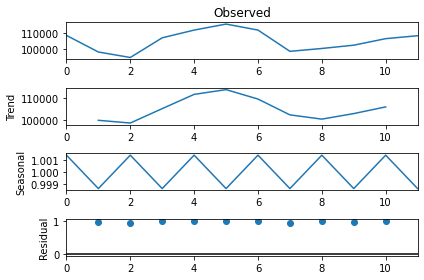

In [639]:

ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_DEL_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

In [681]:
crimes_DEL_forecast = crime_DEL_df.copy()
crimes_DEL_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_DEL_forecast = crimes_DEL_forecast.reset_index(drop = True)
crimes_DEL_forecast = crimes_DEL_forecast.set_index(crimes_DEL_forecast['YEAR'], drop=False, append=False, inplace=False, verify_integrity=False).drop('YEAR', 1)
#crimes_DEL_forecast = crimes_DEL_forecast.set_index(crimes_DEL_forecast['YEAR'], drop=False, append=False, inplace=False, verify_integrity=False)
#crimes_DEL_forecast.index=crimes_DEL_forecast.index.year
crimes_DEL_forecast

,TOTAL
YEAR,
2001-01-01,108768
2002-01-01,98274
2003-01-01,94808
2004-01-01,107246
2005-01-01,112130
2006-01-01,115926
2007-01-01,112130
2008-01-01,98700
2009-01-01,100502


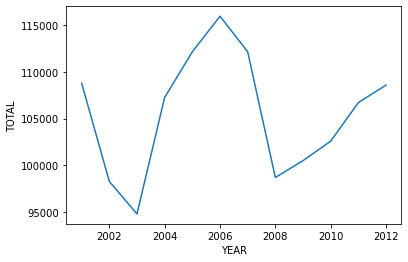

In [682]:
plt.xlabel('YEAR')
plt.ylabel('TOTAL')
plt.plot(crimes_DEL_forecast)

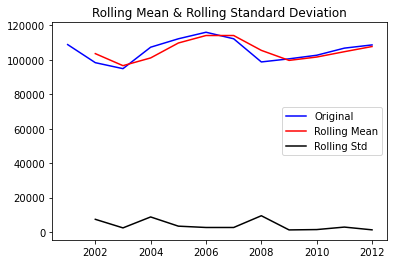

In [683]:
rolling_mean = crimes_DEL_forecast.rolling(window = 2).mean()
rolling_std = crimes_DEL_forecast.rolling(window = 2).std()
plt.plot(crimes_DEL_forecast, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [684]:
result = adfuller(crimes_DEL_forecast['TOTAL'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 8.4119184349806
p-value: 1.0
Critical Values:
	1%: -4.9386902332361515
	5%: -3.477582857142857
	10%: -2.8438679591836733


In [685]:
from statsmodels.tsa.stattools import adfuller


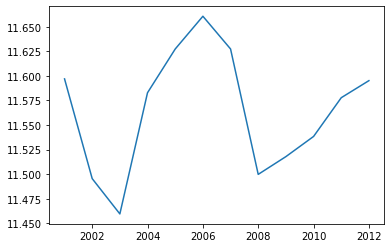

In [686]:
df_log = np.log(crimes_DEL_forecast)
plt.plot(df_log)


In [687]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['y'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

In [688]:
#rolling_mean = df_log.rolling(window=2).mean()
#df_log_minus_mean = df_log - rolling_mean
#df_log_minus_mean.dropna(inplace=True)
#get_stationarity(df_log_minus_mean)

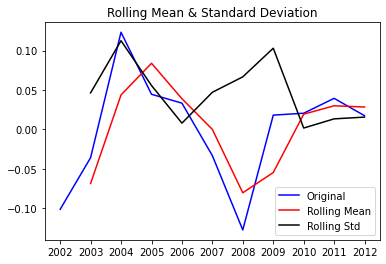

ADF Statistic: -4.987939721406555
p-value: 2.3445750093798292e-05
Critical Values:
	1%: -4.9386902332361515
	5%: -3.477582857142857
	10%: -2.8438679591836733


,TOTAL
YEAR,
2002-01-01,-0.101458
2003-01-01,-0.035906
2004-01-01,0.123271
2005-01-01,0.044534
2006-01-01,0.033293
2007-01-01,-0.033293
2008-01-01,-0.127574
2009-01-01,0.018093
2010-01-01,0.020504


In [689]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)
df_log_shift

In [690]:
#def adfull(ts):
#    result = adfuller(ts, autolag=None)
#    result_out = pd.Series(result[0:4], index=["Test Stats",
#                                              'P-value',
#                                              'lags_used',
#                                              'Number of observation'])
#    print(result_out)
#    

In [691]:
#adfull(crimes_DEL_forecast.TOTAL)

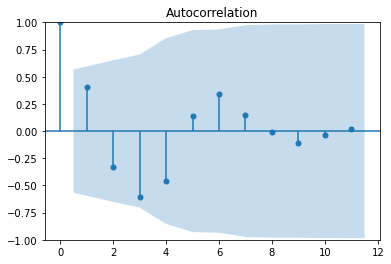

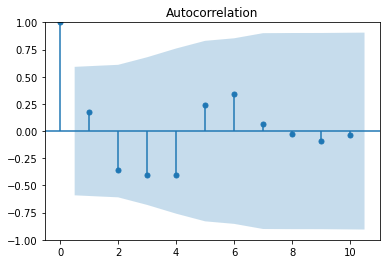

In [692]:
acf_plot = plot_acf(crimes_DEL_forecast.TOTAL)
acf_plot = plot_acf(df_log_shift)

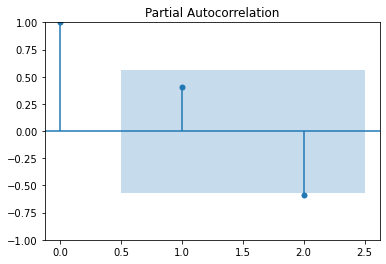

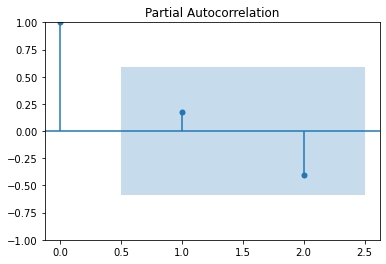

In [693]:
pcf_1 = plot_pacf(crimes_DEL_forecast.TOTAL, lags=2, method='ywm')
pcf_1 = plot_pacf(df_log_shift,lags=2, method='ywm')

In [694]:
#d=1 one differencing to make it stationary
#df_log=df_log.reset_index()


In [695]:
#crimes_DEL_forecast = crimes_DEL_forecast.reset_index()
crimes_DEL_forecast

,TOTAL
YEAR,
2001-01-01,108768
2002-01-01,98274
2003-01-01,94808
2004-01-01,107246
2005-01-01,112130
2006-01-01,115926
2007-01-01,112130
2008-01-01,98700
2009-01-01,100502


In [760]:
decomposition = seasonal_decompose(df_log , model = "multiplicative", period=2 ) 
model = ARIMA(crimes_DEL_forecast.TOTAL.astype(np.float64).to_numpy(), order=(0,1,0))
results = model.fit()
results.fittedvalues
#plt.plot(df_log_shift)
#plt.plot(results.fittedvalues, color='red')
#ts_decompose = seasonal_decompose(df_log)

#model = ARIMA(df_log.TOTAL[:10].astype(np.float64).to_numpy(), order=(1,1,2))
#results = model.fit()
#model = ARIMA(df_log, order=(2,1,2))

#results = model.fit()
#plt.plot(df_log_shift)
#plt.plot(results.fittedvalues, color='red')

array([     0., 108768.,  98274.,  94808., 107246., 112130., 115926.,
       112130.,  98700., 100502., 102584., 106706.])

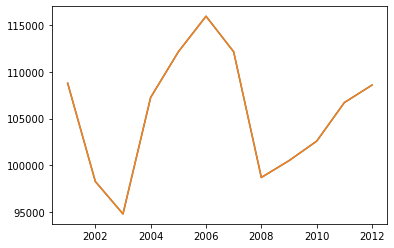

In [761]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
#predictions_ARIMA_diff
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum
predictions_ARIMA_log = pd.Series(df_log.TOTAL[:], index=df_log.index)
predictions_ARIMA_log
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
#predictions_ARIMA_log
predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_ARIMA
plt.plot(crimes_DEL_forecast)
plt.plot(predictions_ARIMA)

In [765]:
results.predict(12,22)

array([108574., 108574., 108574., 108574., 108574., 108574., 108574.,
       108574., 108574., 108574., 108574.])

In [764]:
i=0
for j in range(22):
    crimes_DEL_forecast.loc[i] = crimes_DEL_forecast.YEAR[i-1]+1
    crimes_DEL_forecast.TOTAL[i] = forecast_df_DEL[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_DEL_forecast.index, y= crimes_DEL_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_DEL_forecast['YEAR'], y= crimes_DEL_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

AttributeError: 'DataFrame' object has no attribute 'YEAR'

In [669]:
ts_decompose = seasonal_decompose(df_log)

model = ARIMA(df_log.TOTAL[:10].astype(np.float64).to_numpy(), order=(1,1,2))
results = model.fit()
#model = ARIMA(df_log, order=(2,1,2))

#results = model.fit()
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [554]:
DEL_arim = ARIMA(crimes_DEL_forecast.TOTAL[0:8].astype(np.float64).to_numpy(), order=(0,1,0))
DEL_moDEL = DEL_arim.fit()
DEL_moDEL.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    8
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -73.296
Date:                Tue, 23 Nov 2021   AIC                            148.592
Time:                        10:13:54   BIC                            148.538
Sample:                             0   HQIC                           147.924
                                  - 8                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.166e+07   5.69e+07      1.260      0.208   -3.98e+07    1.83e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):                 0.37
Prob(Q):                              0.41   Prob(JB):                         0.83
Heteroskedasticity (H):               1.59   Skew:                             0.14
Prob(H) (two-sided):                  0.77   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [555]:
def get_mape(actual, predicted):
    y_actual = np.array(actual)
    y_pred = np.array(predicted)
    return np.round(np.mean(np.abs((y_actual - y_pred)/actual)) * 100,2)

In [556]:
forecast_DEL = DEL_moDEL.predict(8,11)
print('prediction',forecast_DEL)
forecast_df_DEL = DEL_moDEL.forecast(steps=10)
print('forecasting',forecast_df_DEL)

prediction [98700. 98700. 98700. 98700.]
forecasting [98700. 98700. 98700. 98700. 98700. 98700. 98700. 98700. 98700. 98700.]


In [557]:
get_mape(crimes_DEL_forecast.TOTAL[8:12],forecast_DEL)


5.54

In [559]:
i=12
for j in range(len(forecast_df_DEL)):
    crimes_DEL_forecast.loc[i] = crimes_DEL_forecast.YEAR[i-1]+1
    crimes_DEL_forecast.TOTAL[i] = forecast_df_DEL[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_DEL_forecast['YEAR'], y= crimes_DEL_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_DEL_forecast['YEAR'][12:], y= crimes_DEL_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

AttributeError: 'DataFrame' object has no attribute 'YEAR'